<a href="https://colab.research.google.com/github/chanakatb/pytorch_deep_learning/blob/main/Create_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Deep Learning with PyTorch 10**

**Convolutional Neural Network Intro**

*minist dats set*: *https://www.tensorflow.org/datasets/catalog/mnist*

Training data set includes 60k images and test data set includes 10k images.

## **Deep Learning with PyTorch 11**

**Image Filter / Image Kernel Overview**

*Website for image filters (image Kernels): https://setosa.io/ev/image-kernels/*

## **Deep Learning with PyTorch 12**

**Convolutional Layer and RGB**

In CNN, neurons are not fully connected and are locally connected.
Pooling layer reduces the number of parameters that need to be trained.

A typical CNN architecture: https://editor.analyticsvidhya.com/uploads/59954intro%20to%20CNN.JPG

## **Deep Learning with PyTorch 13**

A typical pooling layer: https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png

**Pooling Layer in Convolutional Neural Network**

## **Deep Learning with PyTorch 14**

**Import MNIST Images**

In [147]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
# Convert MNIST Image files into a Tensor of 4-dimensions (# of images, Height, Width, Color channels)
transform = transforms.ToTensor()

In [149]:
# Train Data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

In [150]:
# Test Data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [151]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [152]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

## **Deep Learning with PyTorch 15**

**Convolutional and Pooling Layers**

In [153]:
# Create a small batch size for images ... let's say 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [154]:
# Define our CNN
# Describe convolution layer and what it is doing (2 convolution layers)
# This is just an example in the next video we will build out actual model
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)
# conv1:
    # Takes 1 input channel (e.g., grayscale images with one channel).
    # Outputs 6 feature maps (i.e., 6 filters are applied to detect features).
    # Uses a 3x3 kernel (filter size) with a stride of 1 (the step size for moving the filter).
# conv2:
    # Takes 6 input channels (from the 6 feature maps produced by conv1).
    # Outputs 16 feature maps.
    # Again uses a 3x3 kernel with a stride of 1.

In [155]:
# Grab 1 MNIST image
for i, (X_Train, y_train) in enumerate(train_data):
  break

In [156]:
X_Train.shape

torch.Size([1, 28, 28])

In [157]:
x = X_Train.view(1,1,28,28) # 28 - height, 28 - width
# 1 - Batch Size: The first 1 represents the batch size. In this case, you're working with a batch size of 1, which means you're feeding one image at a time to the network.
# 1 - Number of Channels: The second 1 is the number of channels in the image. Since this image is likely a grayscale image (like the MNIST dataset), it has only 1 channel. If it were an RGB image, this value would be 3 (for the Red, Green, and Blue channels).

In [158]:
# Perform our first convolution
x = F.relu(conv1(x)) # Rectified Linear unit for our activation funciton

In [159]:
# 1 - single image, 6 - filters, 26x26 - images size
x.shape

torch.Size([1, 6, 26, 26])

In [160]:
# Pass through the pooling layer
x = F.max_pool2d(x, 2, 2) # 2- kernel size, 2 - stride

In [161]:
# 1 - single image, 6 - filered images (featured maps), 13x13 - images size
x.shape

torch.Size([1, 6, 13, 13])

In [162]:
# Do our second convolution layer
x = F.relu(conv2(x))

In [163]:
# 1 - single image, 16 - filered images (featured maps), 11x11 - images size
x.shape

torch.Size([1, 16, 11, 11])

In [164]:
# Pass through the pooling layer
x = F.max_pool2d(x, 2, 2) # 2- kernel size, 2 - stride

In [165]:
# 1 - single image, 16 - filered images (featured maps), 5x5 - images size
x.shape

torch.Size([1, 16, 5, 5])

## **Deep Learning with PyTorch 16**

**Convolutional Neural Network Mode**l

In [166]:
# Model Class
class ConvolutionNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)

    # conv1:
      # Takes 1 input channel (e.g., grayscale images with one channel).
      # Outputs 6 feature maps (i.e., 6 filters are applied to detect features).
      # Uses a 3x3 kernel (filter size) with a stride of 1 (the step size for moving the filter).
    # conv2:
      # Takes 6 input channels (from the 6 feature maps produced by conv1).
      # Outputs 16 feature maps.
      # Again uses a 3x3 kernel with a stride of 1.

    # Fully connected layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  # Forward function
  def forward(self, X):
    # First pass
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)
    # Second pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)

    # Re-View to flatter it out
    X = X.view(-1, 16*5*5)

    # Fully connected layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)

In [167]:
# Create an instance of our model
torch.manual_seed(41)
model = ConvolutionNetwork()
model

ConvolutionNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [168]:
# Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## **Deep Learning with PyTorch 17**

**Train and Test CNN Model**

In [169]:
import time
start_time = time.time()

# Create variable to track things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct =[]

# For loop of epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  # Train
  for b, (X_train, y_train) in enumerate(train_loader):
    b +=1 # start our batches at 1
    y_pred = model(X_train) # get predicted values from the training set. Not flatterned, it is 2d
    loss = criterion(y_pred, y_train) # how off are we? compare the predications to correct answers in t_train

    predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predications. Indexed off the first point
    batch_corr = (predicted == y_train).sum() # how manny we got correct for this batch. True = 1, False = 0
    trn_corr += batch_corr # keep track as we go along in trainig

    # Update our paramets
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print out some results
    if b % 600 == 0:
      print(f"Epoch: {i} Batch: {b} Loss: {loss.item()}")

  train_losses.append(loss)
  train_correct.append(trn_corr)


  # Test
  with torch.no_grad(): # No gradient so we don't update with our weights and biases with test data
    for b, (X_test, y_test) in enumerate(test_loader):
      b +=1 # start out batches at 1
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] # adding up correct prediction
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)

current_time = time.time()
total = current_time -  start_time
print(f"Training took: {total/60} minutes")

Epoch: 0 Batch: 600 Loss: 0.1623610556125641
Epoch: 0 Batch: 1200 Loss: 0.1502392590045929
Epoch: 0 Batch: 1800 Loss: 0.4744560718536377
Epoch: 0 Batch: 2400 Loss: 0.14238706231117249
Epoch: 0 Batch: 3000 Loss: 0.007758188061416149
Epoch: 0 Batch: 3600 Loss: 0.3836284875869751
Epoch: 0 Batch: 4200 Loss: 0.0038223876617848873
Epoch: 0 Batch: 4800 Loss: 0.0021286322735249996
Epoch: 0 Batch: 5400 Loss: 0.0569545142352581
Epoch: 0 Batch: 6000 Loss: 0.00038789428072050214
Epoch: 1 Batch: 600 Loss: 0.005851339548826218
Epoch: 1 Batch: 1200 Loss: 0.3855525553226471
Epoch: 1 Batch: 1800 Loss: 0.004819948226213455
Epoch: 1 Batch: 2400 Loss: 0.003216963727027178
Epoch: 1 Batch: 3000 Loss: 0.0332382395863533
Epoch: 1 Batch: 3600 Loss: 0.5372857451438904
Epoch: 1 Batch: 4200 Loss: 0.04561494290828705
Epoch: 1 Batch: 4800 Loss: 0.0007510822033509612
Epoch: 1 Batch: 5400 Loss: 0.0001173773780465126
Epoch: 1 Batch: 6000 Loss: 0.14201366901397705
Epoch: 2 Batch: 600 Loss: 0.023733172565698624
Epoch: 2

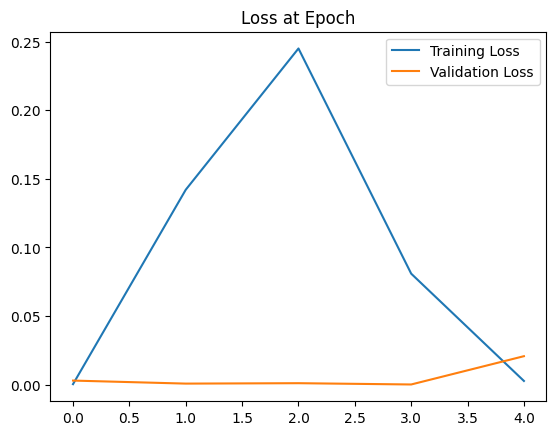

In [170]:
# Graph the loss at epoch
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

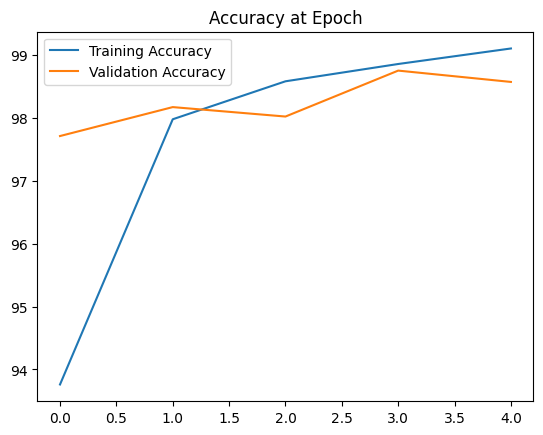

In [171]:
# Graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at Epoch")
plt.legend()

In [172]:
test_load_everthing = DataLoader(test_data, batch_size=10000, shuffle=False)

In [173]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everthing:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

In [174]:
# Did for correct
correct.item()/len(test_data)*100

98.57000000000001

## **Deep Learning with PyTorch 19**

**Send New Image Thru The Model**

In [175]:
# Grab an image
test_data[4143] # Tensor with an image it. At the end, it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [176]:
# Grad just the data
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [177]:
# Reshape it
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

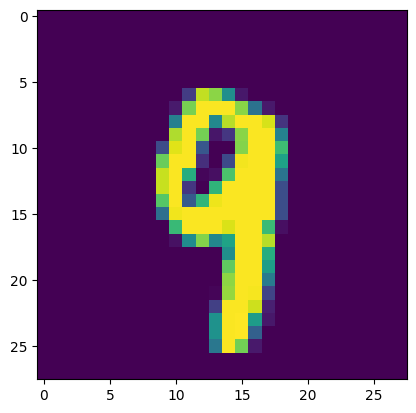

In [178]:
# Show the image
plt.imshow(test_data[4143][0].reshape(28,28))

In [179]:
# Pass the image through our model
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1, 1, 28, 28)) # batch size of 1, 1 color channel, 28x28 image

In [180]:
# Check the new prediction. Get probabilities
new_prediction

tensor([[-2.1693e+01, -1.8584e+01, -2.1709e+01, -1.5842e+01, -8.6330e+00,
         -1.8415e+01, -3.1769e+01, -1.2734e+01, -1.3396e+01, -1.8273e-04]])

In [181]:
new_prediction.argmax()

tensor(9)